<a href="https://colab.research.google.com/github/alekzanderx1/NYC-Citywide-Payroll-Data-Profiling-and-Cleaning/blob/main/DataProfiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Loading the data

In [1]:
pip install openclean

     |████████████████████████████████| 267 kB 7.9 MB/s 
     |████████████████████████████████| 260 kB 29.8 MB/s 
     |████████████████████████████████| 69 kB 3.6 MB/s 
     |████████████████████████████████| 109 kB 48.9 MB/s 
     |████████████████████████████████| 137 kB 42.4 MB/s 
     |████████████████████████████████| 525 kB 31.6 MB/s 
     |████████████████████████████████| 206 kB 46.4 MB/s 
     |████████████████████████████████| 180 kB 40.4 MB/s 
     |████████████████████████████████| 596 kB 42.8 MB/s 
     |████████████████████████████████| 149 kB 61.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 3.5 MB 55.9 MB/s 
     |████████████████████████████████| 961 kB 55.1 MB/s 
     |████████████████████████████████| 636 kB 50.7 MB/s 
  Created wheel for datasize: filename=datasize-1.0.0-py2.py3-none-any.whl size=155047 sha256=6494071b23819ea85c02f42a7c87414b0109b3e2b27

In [2]:
from openclean.data.source.socrata import Socrata
import gzip
import os

dataset = Socrata().dataset('k397-673e')

In [3]:
datafile = './k397-673e.tsv.gz'

In [4]:
if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)

In [5]:
from openclean.pipeline import stream

ds_full = stream(datafile)

In [6]:
ds_full.count()

4496767

In [7]:
# convert to dataframe for use in certain queries and matplotlib
df = ds_full.to_df()
df = df.astype({"Fiscal Year" : int, "Base Salary": float, "Regular Hours": float, "Regular Gross Paid": float, "OT Hours": float, "Total OT Paid": float, "Total Other Pay": float})


## Profiling the Dataset

In [8]:
from openclean.profiling.column import DistinctValueProfiler
from openclean.function.eval.base import Col

In [9]:
ds_full.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
5,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,03/18/2019,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,87900.95,0,0.00,-3202.74
6,2020,17,OFFICE OF EMERGENCY MANAGEMENT,VAZQUEZ,MARGARET,,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.00,per Annum,1820,84312.72,0,0.00,0.00
7,2020,17,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,05/15/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83976.54,0,0.00,0.00
8,2020,17,OFFICE OF EMERGENCY MANAGEMENT,MURRELL,JALEESA,S,12/01/2014,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83877.36,0,0.00,0.00
9,2020,17,OFFICE OF EMERGENCY MANAGEMENT,DE LOS SANTOS,JANIRA,,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.00,per Annum,1820,66647.77,348.5,16572.64,144.15


In [10]:
profiles = ds_full.profile(default_profiler=DistinctValueProfiler)

In [11]:
profiles.stats()

,total,empty,distinct,uniqueness,entropy
Fiscal Year,4496767,0,8,1.779056e-06,2.998439
Payroll Number,4496767,1745440,157,5.706337e-05,4.262211
Agency Name,4496767,0,165,3.669303e-05,4.344091
Last Name,4496767,6610,163789,3.647734e-02,14.280872
First Name,4496767,6612,91764,2.043671e-02,11.632334
Mid Init,4496767,1835833,44,1.653555e-05,4.073135
Agency Start Date,4496767,63,15272,3.396265e-03,11.109560
Work Location Borough,4496767,506229,22,5.513041e-06,1.493281
Title Description,4496767,88,1822,4.051879e-04,6.182352
Leave Status as of June 30,4496767,0,5,1.111910e-06,0.720258


In [12]:
profiles.types()

,date,float,int,str
Fiscal Year,0,0,8,0
Payroll Number,0,0,157,0
Agency Name,0,0,0,165
Last Name,0,1,1,163787
First Name,0,2,0,91762
Mid Init,0,0,9,35
Agency Start Date,15272,0,0,0
Work Location Borough,0,0,0,22
Title Description,0,0,0,1822
Leave Status as of June 30,0,0,0,5


In [13]:
profiles.multitype_columns().types()

,float,int,str
Last Name,1,1,163787
First Name,2,0,91762
Mid Init,0,9,35
Regular Hours,86840,2467,0
OT Hours,54758,1687,0


## Analysis on Fiscal Year

In [14]:
ds_full.distinct('Fiscal Year')

Counter({'2014': 509525,
         '2015': 577880,
         '2016': 544817,
         '2017': 562266,
         '2018': 546161,
         '2019': 592431,
         '2020': 590210,
         '2021': 573477})

Findings:

Fiscal Year ranges from 2014 to 2020 and there are no empty columns. No changes needed.

We can do time series analysis over Fiscal Year as there are almost equal number of rows for each year.

## Analysis on Payroll Number

In [15]:
ds_full.distinct('Payroll Number')


Counter({'': 1745440,
         '10': 357,
         '101': 417,
         '102': 5099,
         '103': 408,
         '11': 304,
         '12': 376,
         '125': 5553,
         '126': 366,
         '127': 2284,
         '13': 359,
         '130': 3,
         '131': 838,
         '132': 196,
         '133': 67,
         '134': 64,
         '136': 429,
         '138': 3,
         '14': 276,
         '15': 4747,
         '156': 3724,
         '17': 1048,
         '185': 70,
         '19': 2328,
         '2': 3562,
         '202': 6464,
         '21': 306,
         '210': 1234,
         '214': 766,
         '226': 741,
         '25': 10394,
         '256': 832,
         '257': 154,
         '261': 3093,
         '3': 4981,
         '30': 1926,
         '300': 177793,
         '312': 139,
         '313': 92,
         '32': 1888,
         '33': 2784,
         '341': 19,
         '342': 21,
         '343': 22,
         '344': 15,
         '345': 19,
         '346': 20,
         '347': 16,
   

Findings:

Empty(''): 1745440

Most of the payroll number entries are empty. No negatives. 
We will not perform any analysis on this column so no changes are required here. We will drop this column entirely.

## Analysis on Agency Name

In [16]:
ds_full.distinct('Agency Name')


Counter({"ADMIN FOR CHILDREN'S SVCS": 61219,
         'ADMIN TRIALS AND HEARINGS': 5539,
         'BOARD OF CORRECTION': 200,
         'BOARD OF CORRECTIONS': 17,
         'BOARD OF ELECTION': 8402,
         'BOARD OF ELECTION POLL WORKERS': 278852,
         'BOROUGH PRESIDENT-BRONX': 492,
         'BOROUGH PRESIDENT-BROOKLYN': 631,
         'BOROUGH PRESIDENT-QUEENS': 573,
         'BOROUGH PRESIDENT-STATEN IS': 420,
         'BRONX COMMUNITY BOARD #1': 17,
         'BRONX COMMUNITY BOARD #10': 47,
         'BRONX COMMUNITY BOARD #11': 34,
         'BRONX COMMUNITY BOARD #12': 22,
         'BRONX COMMUNITY BOARD #2': 26,
         'BRONX COMMUNITY BOARD #3': 16,
         'BRONX COMMUNITY BOARD #4': 25,
         'BRONX COMMUNITY BOARD #5': 24,
         'BRONX COMMUNITY BOARD #6': 24,
         'BRONX COMMUNITY BOARD #7': 27,
         'BRONX COMMUNITY BOARD #8': 29,
         'BRONX COMMUNITY BOARD #9': 32,
         'BRONX DISTRICT ATTORNEY': 8477,
         'BROOKLYN COMMUNITY BOARD #1': 2

Findings:

No noticable issues in the names of Agencies.

Observation: Kings County is synonymous with Brooklyn

## Analysis on First Name

In [17]:
ds_full.filter(Col('First Name') == '').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
528088,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,05/06/1991,MANHATTAN,CHIEF RACKETS INVESTIGATOR,ACTIVE,188568.00,per Annum,1820,186592.22,0,0.00,4991.97
528216,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,01/26/2004,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,84965.00,per Annum,2080,84096.14,661.5,41351.02,16524.03
528222,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,02/14/2005,MANHATTAN,ASSISTANT CHIEF RACKET INVESTIGATOR,ACTIVE,139018.00,per Annum,1820,137310.11,0,0.00,3500.00
528238,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,07/05/2005,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,84818.00,per Annum,2080,84626.68,526.5,32764.50,16901.62
528240,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,01/29/2009,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR START >4-24-0...,ACTIVE,90541.00,per Annum,2080,90051.74,508.5,33622.68,10476.97
528245,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,06/01/1999,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,85064.00,per Annum,2080,84194.43,449,28335.83,19835.91
528254,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,12/06/1993,MANHATTAN,ASSISTANT CHIEF RACKET INVESTIGATOR,ACTIVE,125304.00,per Annum,1820,123670.21,0,0.00,6981.09
528261,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,12/24/1990,MANHATTAN,SENIOR RACKETS INVESTIGATOR - START >4-24-08 N...,ACTIVE,108686.00,per Annum,2080,108098.65,3.5,282.07,20859.76
528262,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,08/20/2012,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR START >4-24-0...,ACTIVE,95541.00,per Annum,2080,109604.74,156.5,13837.96,5655.25
528263,2020,901,DISTRICT ATTORNEY-MANHATTAN,,,,05/23/2011,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR START >4-24-0...,ACTIVE,90541.00,per Annum,2080,90051.74,435,28294.13,10072.67


Findings

There are 2033 rows with empty First Name. We suspect that this could be for the following reasons-

1. Negligence 
2. Fraud
3. Technical Glitch

Because we will not be doing any analysis on the name of employees, we do not need to do any cleanup here. We will remove this column as part of data cleaning entirely.


Some rows have int/float values

In [18]:
from openclean.function.eval.datatype import IsFloat
from openclean.function.eval.datatype import IsInt

ds_full.select('First Name').filter(IsFloat('First Name')).distinct()

Counter({'INFINITY': 6, 'NAN': 61})

In [19]:
ds_full.filter(Col('First Name') == 'INFINITY').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
520803,2020,846,DEPT OF PARKS & RECREATION,DRUMMOND,INFINITY,A,06/05/2019,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,15.00,per Hour,12,180.00,0,0.00,0.00
2390524,2017,,DEPT OF ED HRLY SUPPORT STAFF,WILLIAMS,INFINITY,Z,10/09/2015,MANHATTAN,STUDENT AIDE,ACTIVE,11.00,per Hour,0,347.71,0,0.00,0.00
3093701,2018,745,DEPT OF ED HRLY SUPPORT STAFF,WILLIAMS,INFINITY,Z,10/09/2015,MANHATTAN,STUDENT AIDE,CEASED,13.00,per Hour,0,201.00,0,0.00,0.00
3303867,2018,996,NYC HOUSING AUTHORITY,GRAHAM,INFINITY,,05/22/2018,BRONX,CITY SEASONAL AIDE,ACTIVE,21118.00,Prorated Annual,171.5,1505.20,0,0.00,0.00
3862133,2019,996,NYC HOUSING AUTHORITY,GRAHAM,INFINITY,,05/22/2018,BRONX,CITY SEASONAL AIDE,CEASED,21593.00,Prorated Annual,335.5,5599.96,0,0.00,8.75
4368569,2021,300,BOARD OF ELECTION POLL WORKERS,SMALLS,INFINITY,A,01/01/2019,MANHATTAN,ELECTION WORKER,ACTIVE,1.00,per Hour,0,1350.00,0,0.00,0.00


In [20]:
ds_full.filter(Col('First Name') == 'NAN').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
25163,2020,56,POLICE DEPARTMENT,CHEN,NAN,C,07/09/2013,BROOKLYN,SERGEANT-,ACTIVE,88945.00,per Annum,2080,86677.57,312.3,13222.23,17904.91
54297,2020,56,POLICE DEPARTMENT,SAN,NAN,N,05/31/2017,QUEENS,SCHOOL SAFETY AGENT,ACTIVE,37136.00,per Annum,2080,36083.93,134.68,3672.65,1573.20
173574,2020,742,DEPT OF ED PEDAGOGICAL,SHAPIRO,NAN,B,02/01/1988,OTHER,TEACHER,ACTIVE,117551.00,per Annum,0,115041.54,0,0.00,13309.93
230491,2020,742,DEPT OF ED PEDAGOGICAL,DENG,NAN,,09/06/2016,MANHATTAN,TEACHER,ACTIVE,76571.00,per Annum,0,74793.25,0,0.00,1414.19
326430,2020,745,DEPT OF ED HRLY SUPPORT STAFF,LIN,NAN,,07/31/2019,MANHATTAN,STUDENT AIDE,CEASED,15.00,per Hour,0,1282.50,0,0.00,0.00
378286,2020,747,DEPT OF ED PER SESSION TEACHER,DENG,NAN,,09/06/2016,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0,2249.72,0,0.00,6.69
508143,2020,846,DEPT OF PARKS & RECREATION,ZHANG,NAN,D,07/09/2018,MANHATTAN,CERTIFIED IT DEVELOPER,ACTIVE,89520.00,per Annum,1820,88145.60,1.75,85.75,8.25
551127,2020,747,DEPT OF ED PER SESSION TEACHER,SHAPIRO,NAN,B,02/01/1988,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0,322.97,0,0.00,227.58
610565,2016,,POLICE DEPARTMENT,CHEN,NAN,C,07/09/2013,MANHATTAN,POLICE OFFICER,ACTIVE,49760.00,per Annum,2091.42,48146.21,27.75,1466.91,7217.06
695714,2016,,BOARD OF ELECTION POLL WORKERS,PITTS,NAN,H,01/01/2013,MANHATTAN,ELECTION WORKER,ACTIVE,1.00,per Hour,0,303.00,0,0.00,0.00


Seems like INFINITY and NAN are actual names hence no action needs to be taken.

## Analysis on Agency Start Date

In [21]:
profiles.column('Agency Start Date').get('topValues')

[('01/01/2010', 93266),
 ('09/03/2013', 50622),
 ('08/30/2007', 50312),
 ('09/02/2014', 45236),
 ('09/04/2012', 44780),
 ('08/31/2006', 44391),
 ('09/08/2015', 43743),
 ('09/06/2005', 41389),
 ('09/02/2003', 40517),
 ('09/07/2004', 39920),
 ('09/04/2001', 39597),
 ('08/28/2008', 39390),
 ('12/31/1999', 36230),
 ('09/06/2016', 36133),
 ('09/03/2002', 34957),
 ('09/07/1999', 33273),
 ('09/05/2000', 32149),
 ('09/02/1997', 31584),
 ('01/01/2016', 31224),
 ('09/06/2011', 30073),
 ('09/08/1998', 29948),
 ('01/02/2012', 29913),
 ('09/05/2017', 26079),
 ('09/07/2010', 24720),
 ('01/01/2013', 21825),
 ('01/01/2014', 20438),
 ('09/03/1996', 19962),
 ('01/01/2020', 17612),
 ('01/01/2011', 17504),
 ('09/04/2018', 16729),
 ('09/08/2009', 15746),
 ('06/23/1996', 15522),
 ('01/02/2017', 14023),
 ('01/01/2018', 13823),
 ('01/01/2015', 12289),
 ('09/08/2016', 12272),
 ('09/09/2015', 11815),
 ('07/11/2005', 11736),
 ('09/08/1994', 11380),
 ('07/06/2011', 11308),
 ('07/01/2002', 11202),
 ('01/10/2005', 

In [22]:
profiles.minmax('Agency Start Date')

,min,max
date,1901-01-01,9999-12-31 00:00:00


In [23]:
# checking the rows with max value, this looks like an outlier
ds_full.filter(Col('Agency Start Date') == '12/31/9999').count()

415

In [24]:
ds_full.filter(Col('Agency Start Date') == '01/01/1901').count()

8

In [25]:
# checking the rows with max value, this is also an outlier
ds_full.filter(Col('Agency Start Date') == '01/01/1901').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
163299,2020,742,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,124909.00,per Annum,0,122242.80,0,0.00,19884.55
1481430,2015,,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,100048.00,per Annum,0,101617.84,0,0.00,0.00
1847337,2014,742,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,,TEACHER,ACTIVE,86590.00,per Annum,0,92130.61,0,0.00,1000.00
1847338,2014,742,DEPT OF ED PEDAGOGICAL,PERFETTO,LORRAINE,M,01/01/1901,,TEACHER SPECIAL EDUCATION,ACTIVE,86590.00,per Annum,0,86590.08,0,0.00,1000.00
2517981,2017,,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,113762.00,per Annum,0,113691.28,0,0.00,0.00
2934553,2018,742,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,119472.00,per Annum,0,119349.32,0,0.00,0.00
3488124,2019,742,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,121862.00,per Annum,0,143112.79,0,0.00,0.00
3959328,2021,742,DEPT OF ED PEDAGOGICAL,STREKO,DAVID,M,01/01/1901,MANHATTAN,TEACHER,ACTIVE,128657.00,per Annum,0,125377.47,0,0.00,8741.13


Findings - 

The min and max values point out that there may be dates which are -
1. In the Future
2. Way back in the past

These are outliers and hence need to be cleaned up.

## Analysis on Work Location Borough

In [26]:
ds_full.distinct('Work Location Borough')

Counter({'': 506229,
         'ALBANY': 110,
         'BRONX': 205181,
         'BROOKLYN': 372480,
         'Bronx': 935,
         'DELAWARE': 633,
         'DUTCHESS': 169,
         'GREENE': 70,
         'MANHATTAN': 2812248,
         'Manhattan': 1622,
         'NASSAU': 285,
         'ORANGE': 23,
         'OTHER': 95604,
         'PUTNAM': 281,
         'QUEENS': 439033,
         'Queens': 660,
         'RICHMOND': 53654,
         'Richmond': 112,
         'SCHOHARIE': 203,
         'SULLIVAN': 950,
         'ULSTER': 2264,
         'WASHINGTON DC': 53,
         'WESTCHESTER': 3968})

Findings - 

1. We will disregard places that are not NYC boroughs, because these rows are few in number and will not be used for any analysis.
Need to remove: ALBANY, DELAWARE, DUTCHESS, GREENE, NASSAU, ORANGE, PUTNAM, SCHOHARIE, SULLIVAN, ULSTER, WASHINGTON DC, WESTCHESTER, OTHER

2. There are Borough names which are both in upper case and lower case and hence considered as different values. We will fix this by Captializing the column values. 
Need to merge: Bronx, Manhattan, Queens, RIchmond

3. We noticed Staten Island is missing from the values. This is because Richmond is coextensive with Staten Island. Hence, we will rename Richmond to the new name Staten Island.

4. About half a million entries have Empty values, these either need to be disregarded or backfilled in some way. We will mark them as 'UNSPECIFIED' as part of cleaning.

## Analysis on Title Description

In [27]:
ds_full.distinct('Title Description')

Counter({'EMERGENCY PREPAREDNESS MANAGER': 580,
         'EMERGENCY PREPAREDNESS SPECIALIST': 881,
         'COMMISSIONER OF EMERGENCY MANAGEMENT': 11,
         'COMMUNITY ASSOCIATE': 46542,
         'DEPUTY COMMISSIONER': 615,
         'AGENCY ATTORNEY': 10166,
         'FIRST DEPUTY COMMISSIONER': 40,
         'BUDGET ANALYST': 3636,
         'DIRECTOR OF MANAGEMENT & BUDGET': 12,
         'ADMINISTRATIVE STAFF ANALYST': 21692,
         'EXECUTIVE AGENCY COUNSEL': 4698,
         'COMPUTER SYSTEMS MANAGER': 11397,
         'ADMINISTRATIVE MANAGER': 1168,
         'DEPUTY GENERAL COUNSEL': 63,
         'DIRECTOR OF FINANCING POLICY COORDINATION': 9,
         'COMPUTER OPERATIONS MANAGER': 795,
         'ARCHITECT': 846,
         'COMPUTER SPECIALIST': 13315,
         'STATISTICAL SECRETARY': 139,
         'MONITOR': 8041,
         'SUPERVISOR OF OFFICE MACHINE OPERATIONS': 388,
         'COLLEGE AIDE': 9976,
         'ADM MANAGER-NON-MGRL': 6729,
         'SUMMER COLLEGE INTERN': 4213,

In [28]:
# Grouping Title Descriptions based on silimarilty
# The main idea is to identify clusters of values that are different but might be alternative representations of the same thing.
from openclean.cluster.key import KeyCollision
from openclean.function.value.key.fingerprint import Fingerprint

In [29]:
titles = ds_full.update('Title Description',str.upper).distinct('Title Description')


In [30]:
clusters = KeyCollision(func=Fingerprint()).clusters(titles)
len(clusters)

47

In [31]:
# Define simple helper method to print the k largest clusters.

def print_k_clusters(clusters, k=5):
    clusters = sorted(clusters, key=lambda x: len(x), reverse=True)
    val_count = sum([len(c) for c in clusters])
    print('Total number of clusters is {} with {} values'.format(len(clusters), val_count))
    for i in range(min(k, len(clusters))):
        print('\nCluster {}'.format(i + 1))
        for key, cnt in clusters[i].items():
            if key == '':
                key = "''"
            print(f'  {key} (x {cnt})')

In [32]:
print_k_clusters(clusters, 10)

Total number of clusters is 47 with 94 values

Cluster 1
  *ADM SCHOOL SECURITY MANAGER-U (x 20)
  ADM SCHOOL SECURITY MANAGER-U (x 3)

Cluster 2
  *ADMIN SCHL SECUR MGR-MGL (x 4)
  ADMIN SCHL SECUR MGR-MGL (x 1)

Cluster 3
  *ADMINISTRATIVE ATTORNEY (x 27)
  ADMINISTRATIVE ATTORNEY (x 5)

Cluster 4
  *CERTIFIED LOCAL AREA NETWORK ADMINISTRATOR (x 131)
  CERTIFIED LOCAL AREA NETWORK ADMINISTRATOR (x 116)

Cluster 5
  *CERTIFIED WIDE AREA NETWORK ADMINISTRATOR (x 63)
  CERTIFIED WIDE AREA NETWORK ADMINISTRATOR (x 25)

Cluster 6
  *CERTIFIED DATABASE ADMINISTRATOR (x 52)
  CERTIFIED DATABASE ADMINISTRATOR (x 9)

Cluster 7
  *ASSISTANT ADVOCATE-PD (x 10)
  ASSISTANT ADVOCATE-PD (x 62)

Cluster 8
  AGENCY ATTORNEY (x 10166)
  *AGENCY ATTORNEY (x 13)

Cluster 9
  ASSISTANT PURCHASING AGENT (x 18)
  ?ASSISTANT PURCHASING AGENT (x 55)

Cluster 10
  PURCHASING AGENT (x 42)
  ?PURCHASING AGENT (x 73)


Findings - 

1. No outliers or empty rows.

2. Similarity analysis points out there are 47 clusters where Title value are same with minor difference like an extra prefixed * or ?. These can be merged during data cleaning.

## Analysis on Leave Status as of June 30

In [33]:
ds_full.distinct('Leave Status as of June 30')

Counter({'ACTIVE': 3828710,
         'CEASED': 574695,
         'ON LEAVE': 48368,
         'ON SEPARATION LEAVE': 7649,
         'SEASONAL': 37345})

Findings-


Data looks good. Can leave as is.

## Analysis on Pay Basis

In [34]:
ds_full.distinct('Pay Basis')

Counter({'Prorated Annual': 20456,
         'per Annum': 2684554,
         'per Day': 1002261,
         'per Hour': 789496})

In [35]:


ds_full.filter(Col('Pay Basis') == 'per Annum').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
5,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,03/18/2019,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,87900.95,0,0.00,-3202.74
6,2020,17,OFFICE OF EMERGENCY MANAGEMENT,VAZQUEZ,MARGARET,,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.00,per Annum,1820,84312.72,0,0.00,0.00
7,2020,17,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,05/15/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83976.54,0,0.00,0.00
8,2020,17,OFFICE OF EMERGENCY MANAGEMENT,MURRELL,JALEESA,S,12/01/2014,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83877.36,0,0.00,0.00
9,2020,17,OFFICE OF EMERGENCY MANAGEMENT,DE LOS SANTOS,JANIRA,,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.00,per Annum,1820,66647.77,348.5,16572.64,144.15


In [36]:
ds_full.filter(Col('Pay Basis') == 'Prorated Annual').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
651,2020,21,TAX COMMISSION,ALVAREZ,JANET,,12/02/2015,MANHATTAN,COMMISSIONER,ACTIVE,25677.00,Prorated Annual,1300,25538.21,0,0.00,0.00
652,2020,21,TAX COMMISSION,GROSSMAN,SUSAN,,03/01/2005,BRONX,COMMISSIONER,ACTIVE,25677.00,Prorated Annual,1300,25538.21,0,0.00,0.00
653,2020,21,TAX COMMISSION,SILVESTRI,CARLO,,02/04/1990,MANHATTAN,COMMISSIONER,ACTIVE,25677.00,Prorated Annual,1300,25538.21,0,0.00,0.00
654,2020,21,TAX COMMISSION,TZANIDES,KYRIAKOS,P,03/12/2001,BROOKLYN,COMMISSIONER,ACTIVE,25677.00,Prorated Annual,1300,25538.21,0,0.00,0.00
660,2020,21,TAX COMMISSION,NICHOLS,THOMAS,V,01/07/2020,MANHATTAN,COMMISSIONER,ACTIVE,25677.00,Prorated Annual,592.85,11645.85,0,0.00,0.00
3133,2020,30,DEPARTMENT OF CITY PLANNING,KNUCKLES,KENNETH,J,12/01/2011,MANHATTAN,COMMISSIONER DESIGNATED AS VICE CHAIRMAN,ACTIVE,73855.00,Prorated Annual,1673,66799.24,0,0.00,0.00
3148,2020,30,DEPARTMENT OF CITY PLANNING,DE LA UZ,MICHELLE,R,04/09/2012,MANHATTAN,COMMISSIONER,ACTIVE,64224.00,Prorated Annual,1820,63248.09,0,0.00,1000.00
3149,2020,30,DEPARTMENT OF CITY PLANNING,KNIGHT,HOPE,D,12/28/2015,MANHATTAN,COMMISSIONER,ACTIVE,64224.00,Prorated Annual,1820,63248.09,0,0.00,1000.00
3150,2020,30,DEPARTMENT OF CITY PLANNING,LEVIN,ANNA,H,09/03/2009,MANHATTAN,COMMISSIONER,ACTIVE,64224.00,Prorated Annual,1820,63248.09,0,0.00,1000.00
3161,2020,30,DEPARTMENT OF CITY PLANNING,BURNEY,DAVID,J,04/08/2019,MANHATTAN,COMMISSIONER,ACTIVE,64224.00,Prorated Annual,1820,63248.09,0,0.00,0.00


In [37]:
ds_full.filter(Col('Pay Basis') == 'per Day').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
4780,2020,56,POLICE DEPARTMENT,BOYNE,DANIEL,G,04/25/2016,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,1125.25,117728.07,40696.41
4782,2020,56,POLICE DEPARTMENT,MASTRANDE,JAMES,J,12/16/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,1007,103226.97,27980.42
4785,2020,56,POLICE DEPARTMENT,BENCIVENGA,DOMINIC,J,12/30/2013,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,726,76465.30,38080.93
4788,2020,56,POLICE DEPARTMENT,MC AULEY,SEAN,M,10/23/2012,MANHATTAN,SENIOR STATIONARY ENGINEER,ACTIVE,603.84,per Day,2080,166310.57,705.75,80830.38,1703.28
4793,2020,56,POLICE DEPARTMENT,DORSEY,REX,J,09/05/2006,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,641,66621.51,34753.86
4811,2020,56,POLICE DEPARTMENT,GALLAGHER,EUGENE,N,05/14/2007,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,629.75,64267.45,33114.40
4866,2020,56,POLICE DEPARTMENT,RYAN,KERRY,M,07/28/2003,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080,140146.17,784.5,79822.09,13613.95
4902,2020,56,POLICE DEPARTMENT,CALDERON,MILTON,,03/17/2014,MANHATTAN,OILER,ACTIVE,478.00,per Day,2080,131626.74,673,63742.81,33934.11
4910,2020,56,POLICE DEPARTMENT,PUBLIK,RICHARD,J,12/08/1997,MANHATTAN,STATIONARY ENGINEER,ON SEPARATION LEAVE,508.80,per Day,2080,140146.17,749.5,75561.65,12891.11
4943,2020,56,POLICE DEPARTMENT,PENSABENE,THOMAS,,03/16/2009,MANHATTAN,OILER,ACTIVE,478.00,per Day,2080,131626.74,655,64235.30,30391.63


Findings -

No issues with value of this column. 
For the pupose of analysis using the salaries, it might be convinient to covert all the rows to Hourly Rates.

## Analysis on Regular Hours

In [38]:
profiles.minmax('Regular Hours')

,min,max
int,-1260.00,4160.00
float,-730.43,4171.43


In [39]:
# checking the max value to indenfity if it is an outlier.
ds_full.filter(Col('Regular Hours') == '4160').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
110775,2020,72,DEPARTMENT OF CORRECTION,JOHNSON,DAVID,,05/26/2011,QUEENS,CORRECTION OFFICER,ACTIVE,85292.00,per Annum,4160,169314.96,584.5,20853.77,30833.61
3924406,2021,72,DEPARTMENT OF CORRECTION,JOHNSON,DAVID,,05/26/2011,QUEENS,CORRECTION OFFICER,ACTIVE,92073.00,per Annum,4160,181564.57,284,11687.42,27117.90


In [40]:
ds_full.filter(Col('Regular Hours') < '0').count()

1947

In [41]:
ds_full.filter(Col('Regular Hours') == '0').count()

2573275

Findings-

1. There are rows with negative regular hours. This can create issues with analysis using this column. Since the number of such records are low, We will delete these entirely.

2. Although the max value is slightly high, it is not unreasonable and is probably not an outlier.

3. More than half of the dataset have no regular hour reported. We do not intend to remove these rows but they cannot be used for analysis using this column.

4. There are inconsistencies where hours = 0 but gross pay <> 0. This could be because of failure to update the hours column.


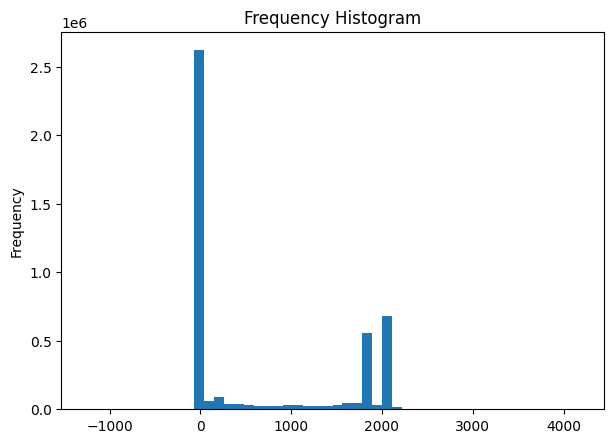

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df['Regular Hours']
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [43]:
# There are few that are > 3000, but not enough that they can skew the results if any aggregation is done

df[df['Regular Hours']> 3000].count

<bound method DataFrame.count of          Fiscal Year Payroll Number  ... Total OT Paid Total Other Pay
110775          2020             72  ...      20853.77        30833.61
1770140         2014             72  ...       9616.95         9475.49
1771191         2014             72  ...       7817.62         5512.54
2111444         2014            827  ...      34853.92        19354.46
2115026         2014            827  ...       9291.67         7596.16
2320037         2017                 ...      39454.30        21003.88
2838473         2018             72  ...      34085.39        24040.34
3384724         2019             72  ...      30841.24        26132.35
3924406         2021             72  ...      11687.42        27117.90

[9 rows x 17 columns]>

## Analysis of Regular Gross Paid

In [44]:
profiles.minmax('Regular Gross Paid')

,min,max
float,-117989.06,672308.86


In [45]:
ds_full.filter(Col('Regular Gross Paid') < '0').count()

6757

3688 rows in negative Pay. This can cause issue in any analysis done with such rows. We will remove these records.

In [46]:
ds_full.filter(Col('Regular Gross Paid') == '672308.86').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
787487,2016,,DEPARTMENT OF TRANSPORTATION,TIPALDO,JOHN,M,01/09/1984,QUEENS,ADMINISTRATIVE ENGINEER,ACTIVE,176702.00,per Annum,1830,672308.86,0,0.00,422.40


Findings -

1. There are rows with negative pays. These need to be removed.
2. The max value may not be an outlier as there are many instances int he data. 

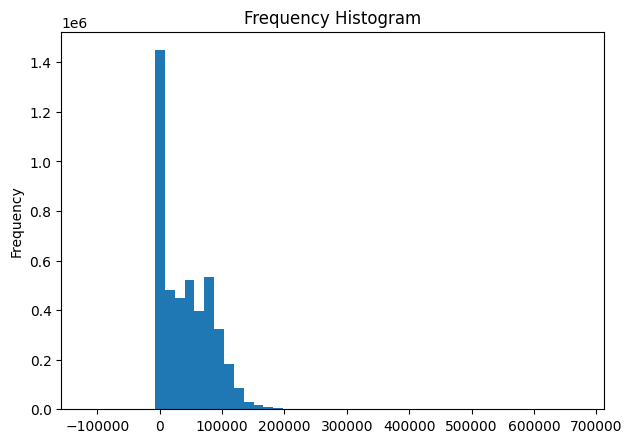

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df['Regular Gross Paid']
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

# Analysis of Total OT Paid	

About 1.5k columns with negative OT Pay, these rows can be removed as they can cause issues with analysis.

In [48]:
profiles.minmax('Total OT Paid')

,min,max
float,-26493.88,248749.72


In [49]:
ds_full.filter(Col('Total OT Paid') < '0').count()

1700

In [50]:
profiles.column('Total OT Paid').get('topValues')

[('0.00', 3240018),
 ('6.94', 313),
 ('110.52', 268),
 ('1.08', 253),
 ('2.16', 237),
 ('45.00', 218),
 ('505.58', 214),
 ('144.00', 201),
 ('0.72', 176),
 ('0.84', 159),
 ('162.00', 156),
 ('141.75', 149),
 ('141.48', 147),
 ('256.31', 144),
 ('0.54', 142),
 ('180.00', 138),
 ('138.00', 138),
 ('0.94', 136),
 ('145.68', 136),
 ('303.75', 131),
 ('81.00', 129),
 ('510.95', 128),
 ('0.90', 127),
 ('514.10', 126),
 ('0.60', 125),
 ('62.44', 124),
 ('22.50', 122),
 ('0.95', 122),
 ('0.27', 120),
 ('54.00', 120),
 ('3.24', 119),
 ('1385.72', 118),
 ('90.00', 116),
 ('4.32', 114),
 ('0.67', 114),
 ('261.71', 114),
 ('515.76', 112),
 ('0.40', 111),
 ('0.66', 109),
 ('0.81', 107),
 ('1.44', 107),
 ('0.42', 106),
 ('0.88', 104),
 ('0.04', 103),
 ('252.79', 103),
 ('0.18', 102),
 ('15.00', 100),
 ('185.40', 100),
 ('1.00', 99),
 ('257.88', 97),
 ('0.36', 96),
 ('40.50', 96),
 ('0.48', 95),
 ('67.50', 95),
 ('30.38', 95),
 ('0.75', 94),
 ('0.30', 93),
 ('0.70', 92),
 ('0.58', 92),
 ('112.50', 92

In [51]:
# checking max value if it an an outlier 
ds_full.filter(Col('Total OT Paid') == '237389.73').head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3201492,2018,826,DEPT OF ENVIRONMENT PROTECTION,PATEL,BHAVESH,N,06/06/1994,RICHMOND,STATIONARY ENGINEER,ACTIVE,467.20,per Day,2085.72,234407.25,1960.25,237389.73,67301.34
